In [4]:
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import nltk as nltk
import pyarrow
import bz2
import json
import datetime
from iteration_utilities import deepflatten
import nltk as nltk
import scipy.stats as stats
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
pd.options.mode.chained_assignment = None
from textblob import TextBlob
from helpers import add_time, week, weekday_number, weekday, month, add_dict, to_dict, get_media, find_media
sns.set_theme(context='notebook', style='white')
plt.tight_layout()
import plotly.express as px

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Benjamin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<Figure size 432x288 with 0 Axes>

In [6]:
data_path = 'C:/Users/Benjamin/Desktop/Quotebank/'
files = ['quotes-2015.json.bz2','quotes-2016.json.bz2','quotes-2017.json.bz2',
                  'quotes-2018.json.bz2','quotes-2019.json.bz2','quotes-2020.json.bz2']

In [19]:
#defining sentiment analyzer
sent_analyzer = SentimentIntensityAnalyzer()

# Defining relevant media outlets
media_outlets = ['nytimes', 'wsj', 'womansday', 'nbcnews', 'foxnews', 'aarp', 'usmagazine', 'espn', 'usatoday', 
'newstoday', 'sportingnews', 'theguardian', 'people', 'tmz', 'mtv', 'cnn', 'msn', 'reuters', 'timesrepublican', 
'nationalgeographic', 'latimes', 'washingtonpost', 'startribune', 'chicagotribune', 'usnews', 'theathletic', 
'si', 'rollingstone', 'vanityfair', 'intouchweekly', 'starmagazine', 'bbc', 'independent', 'thesun', 'thetimes',
'express', 'dailymail', 'mirror', 'economist', ]

# Iterating through all the cleaned data sets in chunks and saving compound, polarity and subjectivity score, and media outlet
for x in range(len(files)): 
  print('Working on %d. dataset'%(x+1))
  df_reader = pd.read_json(data_path + files[x], lines=True, compression='bz2', chunksize=50000)
  a=0
  for chunk in df_reader:
    #Adding date, month, and weekday to the df
    chunk = add_time(chunk)
    
    #Calculating compound score with NLTK Vader
    chunk['compound'] = chunk['quotation'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])

    #Computing polarity and subjectivity score with Text Blob
    chunk['polarity'] = chunk['quotation'].apply(lambda x: TextBlob(x).sentiment[0])
    chunk['subjectivity'] = chunk['quotation'].apply(lambda x: TextBlob(x).sentiment[1])

    #Adding the media outlet to the data frame if the media outlet is included in media_outlets
    chunk = get_media(chunk, media_outlets)
    
    # Only keeping relevant columns
    chunk = chunk[['date_short','compound','polarity','subjectivity','media_outlet','weekday', 'Month']]

    # Writing the chunk to a csv file
    chunk.to_csv(path_or_buf='C:/Users/Benjamin/Desktop/Quotebank/fil%d.csv.bz2'%x, compression='bz2', mode = 'a')

Working on 1. dataset
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loaded
loade

In [7]:
# Reading all quote files into one large dataframe
#files = ['C:/Users/Benjamin/Desktop/Quotebank/fil%d.csv.bz2'%i for i in range(6)]
df = pd.read_csv('C:/Users/Benjamin/Desktop/Quotebank/fil5.csv.bz2')
#df = pd.concat(map(pd.read_csv, [files[0], files[1],files[2], files[3], files[4], files[5]]))

C:\Users\Benjamin\anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
# Converting relevant columns to numeric
df['compound'] = pd.to_numeric(df.compound, errors='coerce')
df['polarity'] = pd.to_numeric(df.polarity, errors='coerce')
df['subjectivity'] = pd.to_numeric(df.subjectivity, errors='coerce')

# Dropping excessive column
df = df.drop('Unnamed: 0', axis=1)

# Sorting column by date
df = df.sort_values(by=['date_short'])

In [9]:
df.head()

,date_short,compound,polarity,subjectivity,media_outlet,weekday,Month
331253,2020-01-01,0.8999,0.390625,0.800000,si,Wednesday,January
4771302,2020-01-01,-0.4019,-0.125000,0.375000,si,Wednesday,January
2999906,2020-01-01,0.3612,0.204167,0.570833,NaN,Wednesday,January
2600469,2020-01-01,0.0000,-0.125000,0.375000,latimes,Wednesday,January
4696208,2020-01-01,0.6956,0.100000,0.766667,NaN,Wednesday,January


In [10]:
mon = df[df['weekday']=='Monday']
tue = df[df['weekday']=='Tuesday']
wed = df[df['weekday']=='Wednesday']
thur = df[df['weekday']=='Thursday']
fri = df[df['weekday']=='Friday']
sat = df[df['weekday']=='Saturday']
sun = df[df['weekday']=='Sunday']

In [11]:
jan = df[df['Month']=='January']
feb = df[df['Month']=='February']
mar = df[df['Month']=='March']
apr = df[df['Month']=='April']
may = df[df['Month']=='May']
jun = df[df['Month']=='June']
jul = df[df['Month']=='July']
aug = df[df['Month']=='August']
sep = df[df['Month']=='September']
oct = df[df['Month']=='October']
nov = df[df['Month']=='November']
dec = df[df['Month']=='December']

In [12]:
df['year'] = df['date_short'].apply(lambda x: int(x[0:4])-2014)

ValueError: invalid literal for int() with base 10: 'date'

In [13]:
weekdays = [mon, tue, wed, thur, fri, sat, sun]
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
i=0
for day in weekdays:
    print(days[i])
    print(' Mean compound score(NLTK): %.3f,   Mean polarity score(Text Blob): %.3f' % (day['compound'].describe()['mean'], day['polarity'].describe()['mean']))
    print(' Std compound score (NLTK): %.3f,   Std polarity score (Text Blob): %.3f' % (day['compound'].describe()['std'], day['polarity'].describe()['std']))
    i+=1

Monday
 Mean compound score(NLTK): 0.178,   Mean polarity score(Text Blob): 0.115
 Std compound score (NLTK): 0.469,   Std polarity score (Text Blob): 0.260
Tuesday
 Mean compound score(NLTK): 0.176,   Mean polarity score(Text Blob): 0.114
 Std compound score (NLTK): 0.466,   Std polarity score (Text Blob): 0.259
Wednesday
 Mean compound score(NLTK): 0.176,   Mean polarity score(Text Blob): 0.114
 Std compound score (NLTK): 0.466,   Std polarity score (Text Blob): 0.259
Thursday
 Mean compound score(NLTK): 0.178,   Mean polarity score(Text Blob): 0.114
 Std compound score (NLTK): 0.466,   Std polarity score (Text Blob): 0.259
Friday
 Mean compound score(NLTK): 0.176,   Mean polarity score(Text Blob): 0.115
 Std compound score (NLTK): 0.467,   Std polarity score (Text Blob): 0.260
Saturday
 Mean compound score(NLTK): 0.185,   Mean polarity score(Text Blob): 0.118
 Std compound score (NLTK): 0.468,   Std polarity score (Text Blob): 0.266
Sunday
 Mean compound score(NLTK): 0.180,   Mean p

In [14]:
mon = [jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
i=0
for mont in mon:
    print(months[i])
    print(' Mean compound score(NLTK): %.3f,   Mean polarity score(Text Blob): %.3f' % (mont['compound'].describe()['mean'], mont['polarity'].describe()['mean']))
    print(' Std compound score (NLTK): %.3f,   Std polarity score (Text Blob): %.3f' % (mont['compound'].describe()['std'], mont['polarity'].describe()['std']))
    i+=1

January
 Mean compound score(NLTK): 0.186,   Mean polarity score(Text Blob): 0.118
 Std compound score (NLTK): 0.473,   Std polarity score (Text Blob): 0.264
February
 Mean compound score(NLTK): 0.191,   Mean polarity score(Text Blob): 0.119
 Std compound score (NLTK): 0.468,   Std polarity score (Text Blob): 0.263
March
 Mean compound score(NLTK): 0.160,   Mean polarity score(Text Blob): 0.108
 Std compound score (NLTK): 0.460,   Std polarity score (Text Blob): 0.255
April
 Mean compound score(NLTK): 0.159,   Mean polarity score(Text Blob): 0.110
 Std compound score (NLTK): 0.461,   Std polarity score (Text Blob): 0.255
May
 Mean compound score(NLTK): nan,   Mean polarity score(Text Blob): nan
 Std compound score (NLTK): nan,   Std polarity score (Text Blob): nan
June
 Mean compound score(NLTK): nan,   Mean polarity score(Text Blob): nan
 Std compound score (NLTK): nan,   Std polarity score (Text Blob): nan
July
 Mean compound score(NLTK): nan,   Mean polarity score(Text Blob): nan
 S

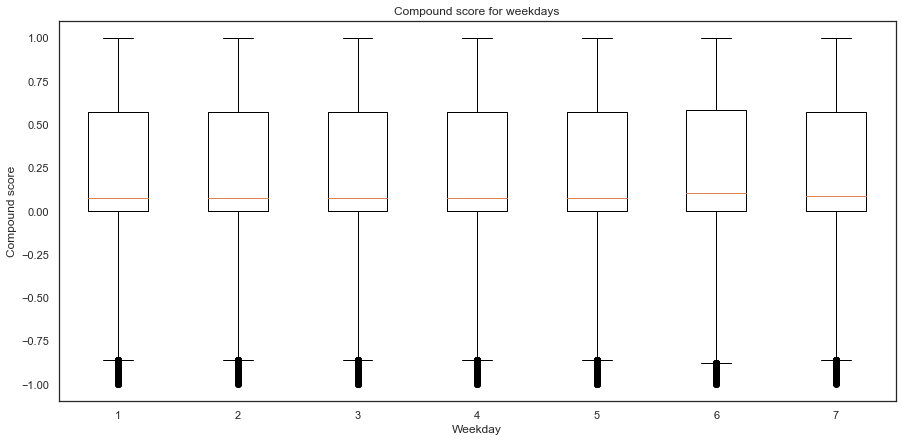

In [15]:
for i in range(len(weekdays)):
    weekdays[i]=weekdays[i]['compound']
fig = plt.figure(figsize=(15, 7))
plt.boxplot(weekdays)
plt.title('Compound score for weekdays')
plt.xlabel('Weekday')
plt.ylabel('Compound score')
plt.show()

In [21]:
fig = px.box(df, x='weekday', y='compound', title='Distribution of compound score for weekdays',category_orders={'weekday':days})
fig.write_html('images/boxplot_day.html')

In [22]:
fig2 = px.box(df, x='Month', y='compound', title='Distribution of compound score for months',category_orders={'Month':months})
fig2.write_html('images/boxplot_month.html')

In [18]:
import mpld3

mpld3.save_html(fig, 'images/boxplot_weekday.html')

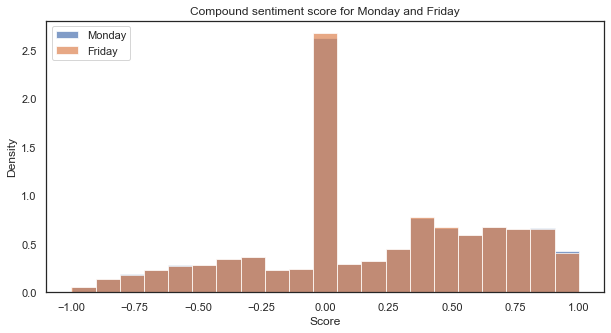

In [54]:
plt.figure(figsize=(10, 5))
plt.hist(mon['compound'], bins=21,density=True, alpha=0.7, label='Monday')
plt.hist(fri['compound'], bins=21,density=True, alpha=0.7, label='Friday')
plt.title("Compound sentiment score for Monday and Friday")
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

In [29]:
fig = px.histogram(df[df.weekday.isin(['Monday', 'Friday'])], x='compound', color='weekday', title='Compound sentiment score for Monday and Friday',nbins=20,histnorm='density')
fig.write_html('images/hist_monfri.html')


In [21]:
fig.show()

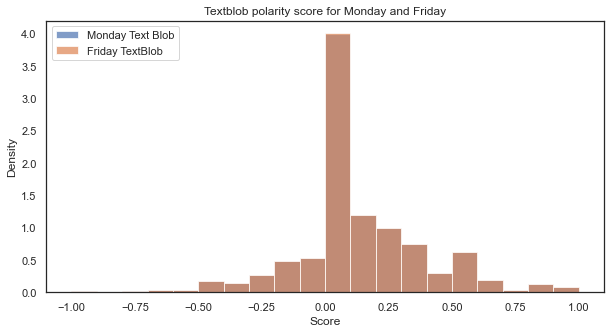

In [53]:
plt.figure(figsize=(10,5))
plt.hist(mon['polarity'], bins=20, alpha=0.7, density=True, label='Monday Text Blob')
plt.hist(fri['polarity'], bins=20, alpha=0.7, density=True, label='Friday TextBlob')
plt.title("Textblob polarity score for Monday and Friday")
plt.legend(loc='upper left')
plt.xlabel('Score')
plt.ylabel('Density')
plt.show()

In [56]:
t, p = stats.ttest_ind(mon['compound'], fri['compound'], equal_var=True)
print("Two sided paired t-test with null hypothesis: The mean mood on Mondays equals the mean mood on Fridays:")
print(f"t-value: {round(t,4)}, p-value: {round(p,4)}")

Two sided paired t-test with null hypothesis: The mean mood on Mondays equals the mean mood on Fridays:
t-value: 0.6206, p-value: 0.5349


In [59]:
t, p = stats.ttest_ind(tue['compound'], sat['compound'], equal_var=True)
print("Two sided paired t-test with null hypothesis: The mean mood on Tuesdays equals the mean mood on Saturdays:")
print(f"t-value: {round(t,4)}, p-value: {round(p,4)}")

Two sided paired t-test with null hypothesis: The mean mood on Tuesdays equals the mean mood on Saturdays:
t-value: -50.8583, p-value: 0.0


In [78]:
df_media = df.dropna()

MemoryError: Unable to allocate 815. MiB for an array with shape (3, 35594211) and data type float64

In [74]:
df_media['year'] = df_media['date_short'].apply(lambda x: int(x[0:4])-2014)
df_media.head()

,date_short,compound,polarity,subjectivity,media_outlet,weekday,Month,mon,tue,wed,thu,fri,sat,sun,year
2574019,2015-01-01,0.0000,0.000000,0.000000,si,Thursday,January,0,0,0,0,1,0,0,1
2574035,2015-01-01,0.0000,0.153333,0.566667,si,Thursday,January,0,0,0,0,1,0,0,1
9695253,2015-01-01,0.5859,-0.050000,0.262500,si,Thursday,January,0,0,0,0,1,0,0,1
5492291,2015-01-01,0.4404,0.000000,0.000000,express,Thursday,January,0,0,0,0,1,0,0,1
18042977,2015-01-01,0.5789,0.000000,0.000000,latimes,Thursday,January,0,0,0,0,1,0,0,1
